In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pylab import *

In [28]:
#CARGAMOS LOS ARCHIVOS
#-----------------------------------------------------
def leernumpy(text):
    file_1 = pd.read_csv(text, sep=',',header = 0)
    matrix = np.array(file_1)
    return matrix

def leerpanda(text):
    file_1 = pd.read_csv(text, sep=',',header = 0)
    return file_1
    

In [29]:
covid_cases = leerpanda('covid-19-peru-data.csv')
covid_cases.head()

,country,iso3c,region,date,confirmed,deaths,recovered,total_tests,negative_tests,pcr_test_positive,serological_test_positive,pcr_serological_test_positive
0,Peru,PER,NaN,2020-03-06,1.0,NaN,NaN,NaN,154.0,NaN,NaN,NaN
1,Peru,PER,NaN,2020-03-07,6.0,NaN,NaN,NaN,213.0,NaN,NaN,NaN
2,Peru,PER,NaN,2020-03-09,9.0,NaN,NaN,NaN,309.0,NaN,NaN,NaN
3,Peru,PER,NaN,2020-03-10,11.0,NaN,NaN,NaN,335.0,NaN,NaN,NaN
4,Peru,PER,NaN,2020-03-11,17.0,NaN,NaN,NaN,697.0,NaN,NaN,NaN


In [30]:
#Explorar los datos
#--------------------------------------------------------------------

In [31]:
covid_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        5315 non-null   object 
 1   iso3c                          5315 non-null   object 
 2   region                         5099 non-null   object 
 3   date                           5315 non-null   object 
 4   confirmed                      5159 non-null   float64
 5   deaths                         4561 non-null   float64
 6   recovered                      234 non-null    float64
 7   total_tests                    4024 non-null   float64
 8   negative_tests                 4056 non-null   float64
 9   pcr_test_positive              4668 non-null   float64
 10  serological_test_positive      4604 non-null   float64
 11  pcr_serological_test_positive  24 non-null     float64
dtypes: float64(8), object(4)
memory usage: 498.4+ KB

In [32]:
covid_cases["region"].value_counts()

Arequipa              210
Cusco                 210
Huánuco               210
Ica                   210
La Libertad           208
Lambayeque            208
Ancash                208
Callao                208
Piura                 208
Loreto                206
Madre de Dios         205
Junín                 203
San Martín            200
Tumbes                199
Cajamarca             198
Pasco                 196
Ayacucho              194
Tacna                 194
Huancavelica          191
Apurimac              189
Moquegua              187
Puno                  185
Amazonas              184
Ucayali               182
Lima                  114
Lima Región            96
Lima Metropolitana     96
Name: region, dtype: int64

In [33]:
covid_cases.describe()

,confirmed,deaths,recovered,total_tests,negative_tests,pcr_test_positive,serological_test_positive,pcr_serological_test_positive
count,5159.000000,4561.000000,234.000000,4.024000e+03,4.056000e+03,4668.000000,4604.000000,24.000000
mean,25050.533824,1144.624205,198657.931624,1.694682e+05,1.364925e+05,6726.892888,20654.697003,34.583333
std,89264.839341,3926.688455,222406.991412,5.058952e+05,4.055159e+05,24124.726228,68290.859950,72.926358
min,1.000000,1.000000,1.000000,3.250000e+03,-2.767580e+05,1.000000,1.000000,1.000000
25%,510.000000,23.000000,6225.250000,2.181375e+04,1.836375e+04,158.000000,828.750000,1.750000
50%,3996.000000,169.000000,113651.500000,4.220500e+04,3.455650e+04,833.000000,4397.500000,3.000000
75%,13660.500000,661.000000,334168.000000,7.943625e+04,6.328075e+04,2411.500000,12873.750000,6.250000
max,838614.000000,33098.000000,728216.000000,4.003363e+06,3.164749e+06,191253.000000,647361.000000,231.000000


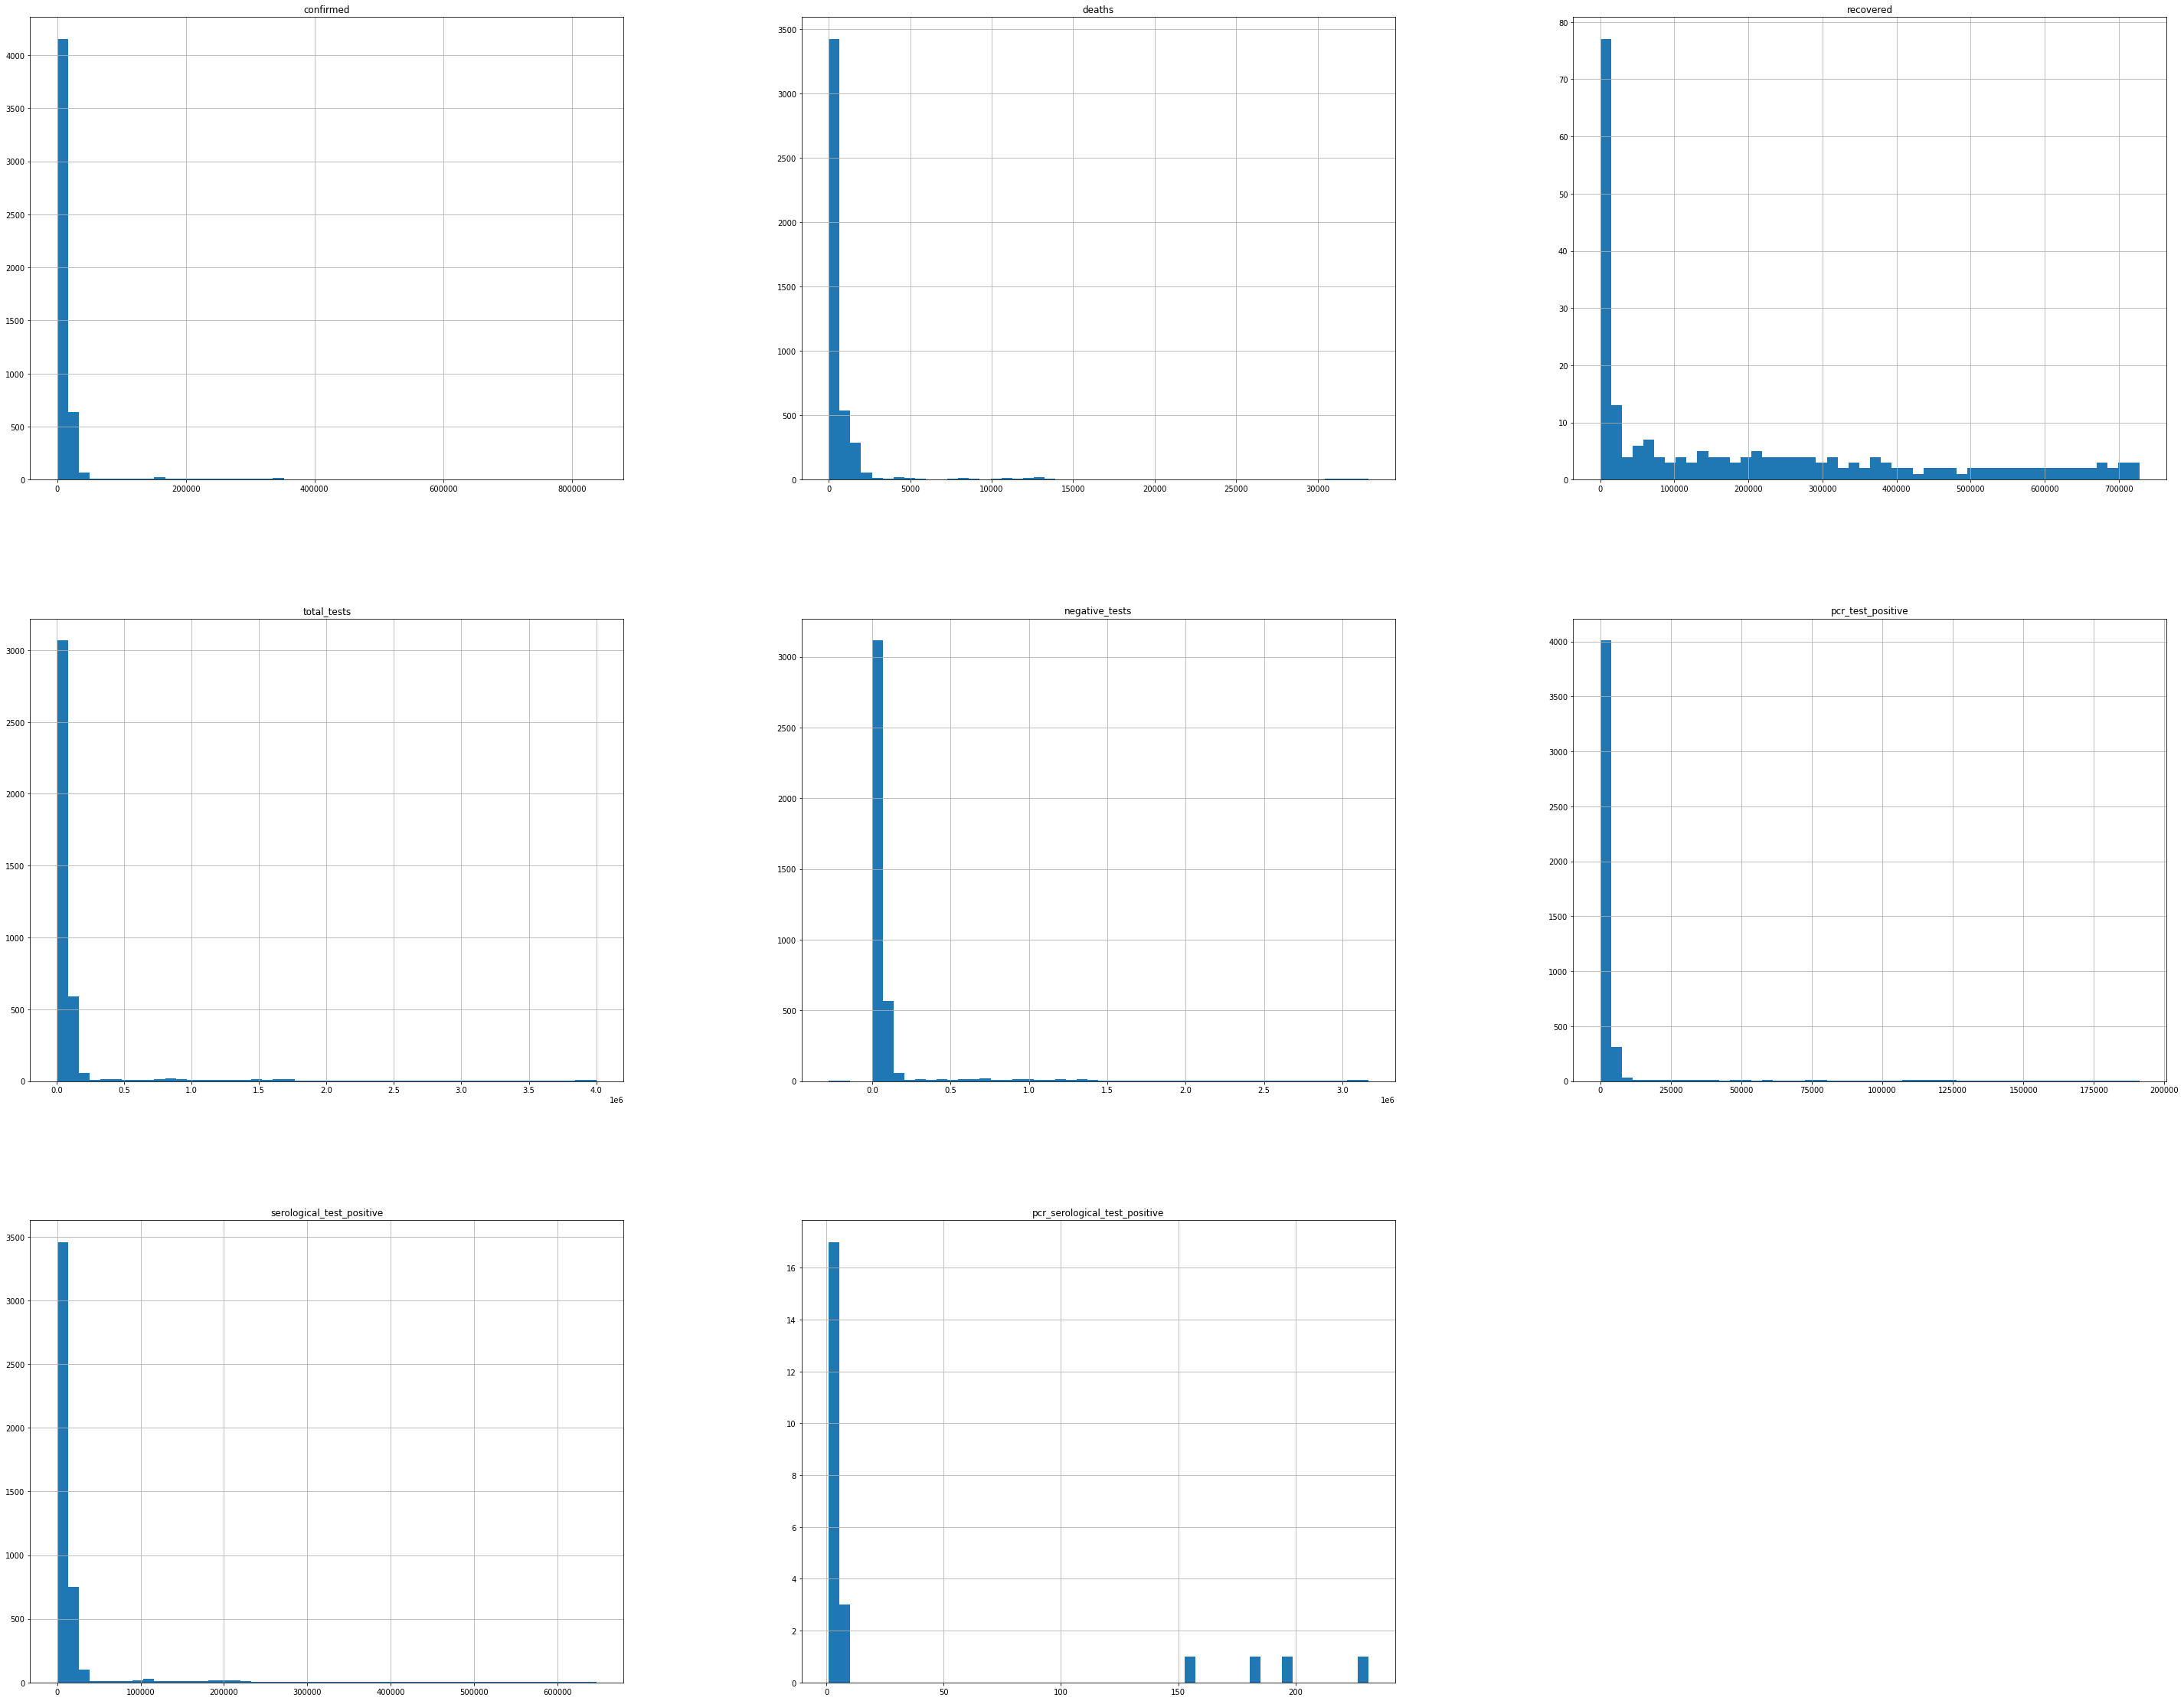

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
covid_cases.hist(bins=50, figsize=(50,40))
#save_fig("attribute_histogram_plots")
plt.show()

In [35]:
#Preparar los datos
#Normalizacion
#----------------------------------------------------------


In [36]:
def normalizar(matriz):
    promedio = np.sum(matriz, axis = 0)/matriz.shape[0]
    minimos = matriz.min(axis = 0)
    maximos = matriz.max(axis = 0)
    matriz = (matriz - promedio)/(maximos - minimos)
    return matriz

def desnormalizar(matriz, maximo, minimo, promedio):
    return matriz *(maximo-minimo) +promedio

In [37]:
#Conjuntos entrenamiento prueba
#---------------------------------------------

In [38]:
def crear_entrenamiento_prueba(matriz):
    sep = int(matriz.shape[0]*0.8)
    entrenamiento = matriz[:sep]
    prueba = matriz[sep:]
    return entrenamiento, prueba

In [39]:
#creacion de subconjuntos
#---------------------------------------------

In [40]:
def crear_subconjuntos(entrenamiento):
    sep = entrenamiento.shape[1]-1
    x = entrenamiento[:, 0:sep]
    y = entrenamiento[:, sep:]
    x  = np.concatenate((np.ones((len(x), 1)), x), axis=1)
    return x, y


In [41]:
#Llenado de nan
#------------------------------------------------

In [42]:
def llenarceros(matriz, col):
    r_matriz = matriz
    for i in range(r_matriz.shape[0]):
        if(pd.isnull(r_matriz[i][col])):
            r_matriz[i][col] = 0
    return r_matriz

In [43]:
#Fecha a Entero
#--------------------------------------------------

In [44]:
def fecha_entero(matriz, col):
    r_matriz = matriz
    for i in range(r_matriz.shape[0]):
        dt = np.datetime64(r_matriz[i][col])
        dt64 = np.datetime64(dt)
        ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
        r_matriz[i][col] = ts
    return r_matriz

In [45]:
#Funciones
#----------------------------------------------------------

In [46]:
def filtrado(matriz, text):
    matriz_r = matriz
    if(text == ''):
        ind = pd.isnull(matriz_r[:,0:1])
    else:
        ind = matriz_r[:,0:1] == text
    return matriz_r[ind[:,0],:]

In [47]:
#transformation
#--------------------------------------------------------------

In [48]:
# lectura
matriz = leernumpy('covid-19-peru-data.csv')

#filas hasta el 8 de octubre
matriz_1 = matriz


# columnas que mesae intern
matriz_muerte = np.array(matriz_1[:,2:6])
matriz_confirmado = np.array(matriz_1[:,2:5])

# reemplazo los nan por 0
matriz_muerte = llenarceros(matriz_muerte,3)


        
#convierto fecha a entero
matriz_muerte = fecha_entero(matriz_muerte,1)

matriz_confirmado = fecha_entero(matriz_confirmado,1)

# filtro  a peru y a la region arequipa
#Peru
peru_muerte = filtrado(matriz_muerte,'')
peru_confirmado = filtrado(matriz_confirmado,'')

#Arequipa
arequipa_muerte = filtrado(matriz_muerte,'Arequipa')
arequipa_confirmado = filtrado(matriz_confirmado,'Arequipa')

arequipa_muerte = llenarceros(arequipa_muerte,2)
arequipa_confirmado = llenarceros(arequipa_confirmado,2)


#elimino la columna region
peru_muerte = peru_muerte[:,1:]
peru_confirmado = peru_confirmado[:,1:]
arequipa_muerte = arequipa_muerte[:,1:]
arequipa_confirmado =  arequipa_confirmado[:,1:]


#guardo los valores para la desnormalizacion
promedio_peru_muerte = np.sum(peru_muerte, axis = 0)/peru_muerte.shape[0]
minimo_peru_muerte = peru_muerte.min(axis = 0)
maximo_peru_muerte = peru_muerte.max(axis = 0) 

promedio_peru_confirmado = np.sum(peru_confirmado, axis = 0)/peru_confirmado.shape[0]
minimo_peru_confirmado = peru_confirmado.min(axis = 0)
maximo_peru_confirmado = peru_confirmado.max(axis = 0)

promedio_arequipa_muerte = np.sum(arequipa_muerte, axis = 0)/arequipa_muerte.shape[0]
minimo_arequipa_muerte = arequipa_muerte.min(axis = 0)
maximo_arequipa_muerte = arequipa_muerte.max(axis = 0) 

promedio_arequipa_confirmado = np.sum(arequipa_confirmado, axis = 0)/arequipa_confirmado.shape[0]
minimo_arequipa_confirmado = arequipa_confirmado.min(axis = 0)
maximo_arequipa_confirmado = arequipa_confirmado.max(axis = 0) 


for i in range(peru_confirmado.shape[0]):
     peru_confirmado[i][0] = i

peru_muerte_normalizada = normalizar(peru_muerte)
peru_confirmado_normalizada = normalizar(peru_confirmado)
arequipa_muerte_normalizada = normalizar(arequipa_muerte)
arequipa_confirmado_normalizada = normalizar(arequipa_confirmado)



<ipython-input-44-c9021ad16407>:6: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


In [49]:
def hipotesis(theta, x):
    return np.dot(x, theta)



def calc_nuevos_thetas(theta, alpha, h_array, y, x):
    theta[0,0] = theta[0,0] - ( ( alpha /  h_array.shape[0] ) * np.sum( h_array - y ) )
    for i in range (1, theta.shape[0]):
        theta[i,0] = theta[i,0] - ( ( alpha /  h_array.shape[0] ) * np.sum( ( h_array - y )* x[:,i:i+1] ) )
    return theta

def calcular_costo(h_array, y):
    return (1 / (2*h_array.shape[0])) * np.sum( (h_array - y) ** 2 )

def RMSE(x, theta,y_real):
    y_prediccion = np.zeros((y_real.shape[1],1))
    #for i in range (y_real.shape[1]):
    y_prediccion = np.dot(x,theta)
    return np.sqrt(( 1 /  y_prediccion.shape[0] ) * np.sum( (y_prediccion - y_real) ** 2 ))



In [50]:
def gradiente_descendiente(x, y, theta, num_iteracion, tasa_aprendizaje):
    
    inicio_costos = np.zeros(num_iteracion)
    for i in range(num_iteracion):
        h_array = hipotesis(theta, x)
        theta = calc_nuevos_thetas(theta, tasa_aprendizaje, h_array, y,x)
        inicio_costos[i] = calcular_costo(h_array, y)
    return theta, inicio_costos

casos peru confirmados


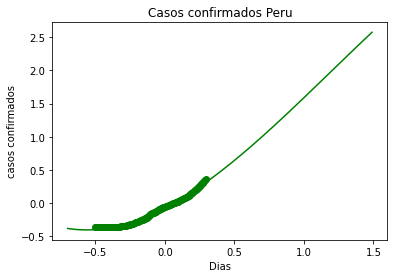

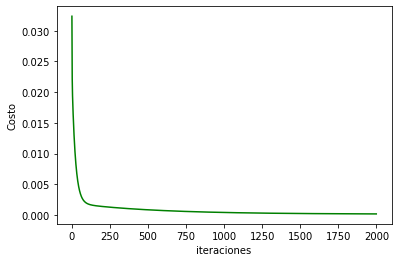

Coeficientes [[-0.07423035]
 [ 1.09825543]
 [ 0.78477562]
 [-0.22035788]]
RMSE 0.044344980123318216
casos Arequipa confirmados


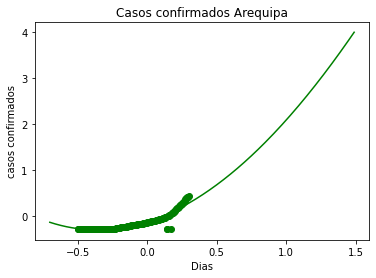

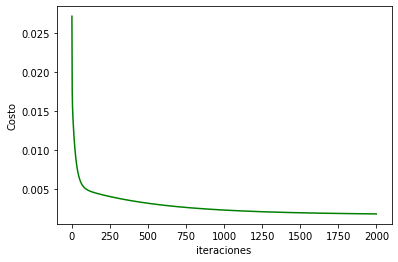

Coeficientes [[-0.12396474]
 [ 0.96913526]
 [ 1.31634581]
 [-0.0721412 ]]
RMSE 0.248701832879347
casos Peru muertes


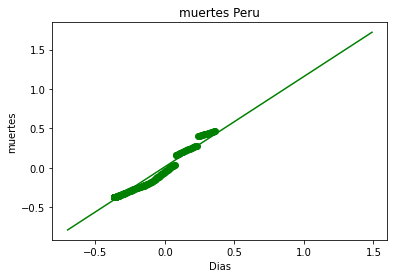

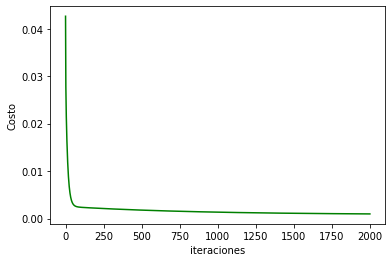

Coeficientes [[ 0.01398155]
 [-0.1640066 ]
 [ 1.30900557]]
RMSE 0.08621971883596602
casos Arequipa muertes


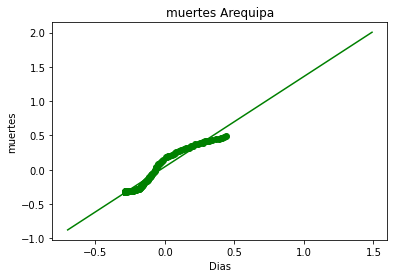

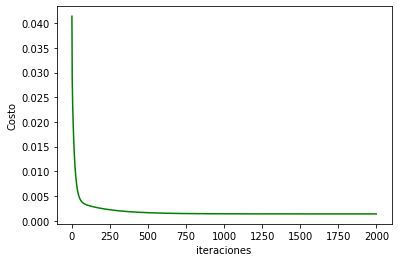

Coeficientes [[0.04413646]
 [0.0537301 ]
 [1.26295734]]
RMSE 0.23224600007676652


In [51]:
def dibujar(matrix,ite,tasa,c_d,titulo):
    # algoritmos
    entrenamiento, prueba = crear_entrenamiento_prueba(matrix)

    x, y = crear_subconjuntos(entrenamiento)
    x_prueba, y_prueba = crear_subconjuntos(prueba)
    

   
    
    if(c_d):
        plt.ylabel("casos confirmados")
        temp_x = np.array(x)
        temp_x = np.concatenate((temp_x,x[:,1:2]**2),axis=1)
        temp_x = np.concatenate((temp_x,x[:,1:2]**3),axis=1)
        
        x_prueba = np.concatenate((x_prueba,x_prueba[:,1:2]**2),axis=1)
        x_prueba = np.concatenate((x_prueba,x_prueba[:,1:2]**3),axis=1)

        theta = np.zeros((temp_x.shape[1],1))
        theta, costos = gradiente_descendiente(temp_x, y, theta, ite, tasa) 
        

        
        x_1 = np.arange(-0.7, 1.5,0.01)
        y_1 = theta[0,0] + theta[1,0] * (x_1) + theta[2,0] * (x_1**2) + theta[3,0] * (x_1**3) 
        plot(x[:,1:2],y,'ro',color="green")
        plot(x_1,y_1,'y', label='gradiente',color="green")
         
    else:
        plt.ylabel("muertes")
        temp_x = np.array(x)

        theta = np.zeros((temp_x.shape[1],1))
        theta, costos = gradiente_descendiente(temp_x, y, theta, ite, tasa) 
            
        x_1 = np.arange(-0.7, 1.5,0.01)
        

        y_1 = theta[0,0] + theta[1,0] * (x_1) + theta[2,0] * (x_1)
        plot(x[:,2:3],y,'ro',color="green")

        plot(x_1,y_1,'y', label='gradiente',color="green")
    
    plt.xlabel("Dias")  

    plt.title(titulo)
    
    
    show()
    
    plt.ylabel("Costo")
    plt.xlabel("iteraciones")  
    plot(costos,'g')
    show()
        
    print("Coeficientes",theta)
    print("RMSE",RMSE(x_prueba, theta, y_prueba))
    return theta, costos



print("casos peru confirmados")
theta_peru_confirmado, costo_peru_confirmado = dibujar(peru_confirmado_normalizada,2000,0.4,1,"Casos confirmados Peru")
print("casos Arequipa confirmados")
theta_arequipa_confirmado, costo_arequipa_confirmado = dibujar(arequipa_confirmado_normalizada,2000,0.4,1, "Casos confirmados Arequipa")
print("casos Peru muertes")
theta_peru_muerte, costo_peru_muerte = dibujar(peru_muerte_normalizada,2000,0.4,0, "muertes Peru")
print("casos Arequipa muertes")
theta_arequipa_muerte, costo_peru_muerte = dibujar(arequipa_muerte_normalizada,2000,0.4,0, "muertes Arequipa")

In [52]:
def predecir(predict_array,theta,c_d,maximo,minimo,promedio):
    # algoritmos

    if(c_d):
        temp_x = np.array(predict_array)
        temp_x = np.concatenate((temp_x,predict_array[:,0:1]**2),axis=1)
        temp_x = np.concatenate((temp_x,predict_array[:,0:1]**3),axis=1)
        
        temp_x  = np.concatenate((np.ones((len(temp_x), 1)), temp_x), axis=1)
        y_1 = hipotesis(theta, temp_x)
    else:
        temp_x = np.array(predict_array)
        temp_x = np.concatenate((np.ones((len(temp_x), 1)), temp_x), axis=1)
        temp_x = np.concatenate((temp_x, np.zeros((len(temp_x), 1))), axis=1)
        y_1 = hipotesis(theta, temp_x)
    
    y_1 = y_1 *(maximo[1:2]-minimo[1:2]) + promedio[1:2]

    return y_1


dates =  np.arange(np.datetime64('2020-10-19'), np.datetime64('2020-10-29')).reshape(10,1)
x_predict = np.zeros((dates.shape[0],1))
for i in range(dates.shape[0]):
    dt = np.datetime64(dates[i][0])
    dt64 = np.datetime64(dt)
    ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
    x_predict[i][0] = ts

    
x_predict_1 = (x_predict - promedio_peru_confirmado[0:1])/(maximo_peru_confirmado[0:1] - minimo_peru_confirmado[0:1])
x_predict_2 = (x_predict - promedio_peru_muerte[0:1])/(maximo_peru_muerte[0:1] - minimo_peru_muerte[0:1])
x_predict_3 = (x_predict - promedio_arequipa_confirmado[0:1])/(maximo_arequipa_confirmado[0:1] - minimo_arequipa_confirmado[0:1])
x_predict_4 = (x_predict - promedio_arequipa_muerte[0:1])/(maximo_arequipa_muerte[0:1] - minimo_arequipa_muerte[0:1])


#prediccion

print("Peru Confirmados")
y_predict_1 = predecir(x_predict_1, theta_peru_confirmado,1,maximo_peru_confirmado,minimo_peru_confirmado,promedio_peru_confirmado)
y_predict_1 = np.concatenate((dates,y_predict_1),axis=1)
print(y_predict_1)

#-----------------------------------------------------------------------------------------------------------------------------
print("Peru muertes")

y_predict_2 = predecir(x_predict_2, theta_peru_muerte,0,maximo_peru_muerte,minimo_peru_muerte,promedio_peru_muerte)
y_predict_2 = np.concatenate((dates,y_predict_2),axis=1)
print(y_predict_2)

#------------------------------------------------------------------------------------------------------------------------------------------------
print("Arequipa confirmados")

y_predict_3 = predecir(x_predict_3, theta_arequipa_confirmado,1,maximo_arequipa_confirmado,minimo_arequipa_confirmado,promedio_arequipa_confirmado)
y_predict_3 = np.concatenate((dates,y_predict_3),axis=1)
print(y_predict_3)

#---------------------------------------------------------------------------------------------------------------------------------------------------------
print("Arequipa muertes")

y_predict_4 = predecir(x_predict_4, theta_arequipa_muerte,0,maximo_arequipa_muerte,minimo_arequipa_muerte,promedio_arequipa_muerte)
y_predict_4 = np.concatenate((dates,y_predict_4),axis=1)
print(y_predict_4)

Peru Confirmados
[[datetime.date(2020, 10, 19) 917776.3910595323]
 [datetime.date(2020, 10, 20) 924618.6504968661]
 [datetime.date(2020, 10, 21) 931475.972988541]
 [datetime.date(2020, 10, 22) 938348.2485123959]
 [datetime.date(2020, 10, 23) 945235.3670462684]
 [datetime.date(2020, 10, 24) 952137.2185679965]
 [datetime.date(2020, 10, 25) 959053.6930554183]
 [datetime.date(2020, 10, 26) 965984.6804863715]
 [datetime.date(2020, 10, 27) 972930.0708386945]
 [datetime.date(2020, 10, 28) 979889.7540902253]]
Peru muertes
[[datetime.date(2020, 10, 19) 243385.84008082742]
 [datetime.date(2020, 10, 20) 242749.08975992707]
 [datetime.date(2020, 10, 21) 242112.33943902672]
 [datetime.date(2020, 10, 22) 241475.5891181264]
 [datetime.date(2020, 10, 23) 240838.83879722605]
 [datetime.date(2020, 10, 24) 240202.0884763257]
 [datetime.date(2020, 10, 25) 239565.33815542536]
 [datetime.date(2020, 10, 26) 238928.58783452504]
 [datetime.date(2020, 10, 27) 238291.8375136247]
 [datetime.date(2020, 10, 28) 237

<ipython-input-52-de0f18e3ed12>:27: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
